# Airline Customer Satisfaction-(ML Project-Classification)

## Introduction

Airline industry is extremely competitive and passenger satisfaction is always top of mind for airline companies. Beside increasing the service quality and the flight safety, passenger satisfaction has a significant influence toward the business. Dissatisfied or disengaged passengers mean fewer return customers, less revenue and degrades the company. It is important that passengers have an excellent experience every time they travel. On-time flights, good in-flight entertainment, more (and better) snacks, and more leg room might be the obvious contributors to a good experience and more loyalty. While we might hear about those aspects the most, the customer experience is not about just the flight itself. Its everything from purchasing the ticket on the company’s website or mobile app to checking bags in at the airport or via a mobile app to waiting in the terminal. Therefore, it is an interesting topic to investigate the relationship between customer’s attitude with some certain factors from satisfaction survey.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading Dataset

In [2]:
df=pd.read_csv("Airline Customer Satisfaction.csv")

In [3]:
df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [5]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


## EDA

Droping un-necessary columns

In [6]:
df.drop('Leg room service',axis=1,inplace=True)
df.drop('Seat comfort',axis=1,inplace=True)

df.drop('Baggage handling',axis=1,inplace=True)
df.drop('Checkin service',axis=1,inplace=True)

df.drop('Inflight service',axis=1,inplace=True)
df.drop('Inflight entertainment',axis=1,inplace=True)

df.drop('On-board service',axis=1,inplace=True)
df.drop('Food and drink',axis=1,inplace=True)

In [7]:
df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Online boarding  Cleanliness  Departure Delay in Minutes  \
0                4            5                          50   
1                4            5                           0   
2                2            2                           0   
3                4            4                           0   
4                1            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

In [8]:
df['Arrival Delay in Minutes'].mean()

14.74085660217047

In [9]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

Now,we have filled the blank columns with the mean value of Arrival delay in muinutes so,now we have no missing values

In [10]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Online boarding                      0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

The column 'Unnamed: 0' consist of index number so we dropped that column as we have our own index 

In [12]:
df.shape

(25976, 16)

We divide the features into Numerical_columns and Categorical_columns

In [13]:
num_col=df.select_dtypes(include=['int64','float']).columns
num_col

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Online boarding', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

There are 7 Numerical columns in our data set and we stored it in variable named 'num_col'

In [14]:
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

There are 5 Categorical columns in our dataset and we store it in a variable named 'Object'

Check the Duplicates in dataset

In [69]:
df.duplicated().sum()

0

There are no duplicates in rows

In [15]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  Gate location  Online boarding  Cleanliness  \
0                       3              4                4            5   
1                       3              1                4            5   
2                       2              4                2            2   
3                       0              2                4            4   
4                       4              3                1            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          50                      44.0   
1                           0                       0.0   
2                           0                       0.0   
3                           0                       6.0   
4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied

### How many people boarded on Airplane were Male and how many were Female?

In [16]:
df[df['Gender']=='Male']['Gender'].count()

12804

In [17]:
df[df['Gender']=='Female']['Gender'].count()

13172

### How many people were there from each class?

In [18]:
df['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

### What was the longest distance that was travelled by plane?

In [19]:
df['Flight Distance'].max()

4983

### What was the lowest distance that was travelled by plane?¶

In [20]:
df['Flight Distance'].min()

31

### Find the customers who were satisfied with the airlines

In [21]:
df[df['satisfaction']=='satisfied']

id  Gender   Customer Type  Age   Type of Travel     Class  \
0       19556  Female  Loyal Customer   52  Business travel       Eco   
1       90035  Female  Loyal Customer   36  Business travel  Business   
3       77959    Male  Loyal Customer   44  Business travel  Business   
4       36875  Female  Loyal Customer   49  Business travel       Eco   
5       39177    Male  Loyal Customer   16  Business travel       Eco   
...       ...     ...             ...  ...              ...       ...   
25956  109108  Female  Loyal Customer   29  Business travel  Business   
25961  126836    Male  Loyal Customer   51  Business travel  Business   
25969  120654    Male  Loyal Customer   52  Business travel  Business   
25972   71167    Male  Loyal Customer   23  Business travel  Business   
25974   90086    Male  Loyal Customer   14  Business travel  Business   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
3                 3377                      0   
4                 1182                      2   
5                  311                      3   
...                ...                    ...   
25956             2864                      5   
25961             2296                      3   
25969              280                      3   
25972              646                      4   
25974             1127                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
3                                      0                       0   
4                                      3                       4   
5                                      3                       3   
...                                  ...                     ...   
25956                                  5                       5   
25961                                  3                       3   
25969                                  3                       3   
25972                                  4                       4   
25974                                  3                       3   

       Gate location  Online boarding  Cleanliness  \
0                  4                4            5   
1                  1                4            5   
3                  2                4            4   
4                  3                1            4   
5                  3                5            5   
...              ...              ...          ...   
25956              5                3            3   
25961              3                5            3   
25969              3                4            3   
25972              4                4            4   
25974              3                4            4   

       Departure Delay in Minutes  Arrival Delay in Minutes satisfaction  
0                              50                      44.0    satisfied  
1                               0                       0.0    satisfied  
3                               0                       6.0    satisfied  
4                               0                      20.0    satisfied  
5                               0                       0.0    satisfied  
...                           ...                       ...          ...  
25956                           0                       0.0    satisfied  
25961                           2                       0.0    satisfied  
25969                           0                       0.0    satisfied  
25972                           0                       0.0    satisfied  
25974                           0                       0.0    satisfied  

[11403 rows x 16 columns]

### What was the highest boardings of class business 

In [22]:
df.groupby('Class').get_group('Business')['Online boarding'].max()

5

### How many Male and Female were not satisfied with the airlines

In [23]:
df[(df['Gender']=='Male')&(df['satisfaction']=='neutral or dissatisfied')].count()[0:1]

id    7136
dtype: int64

In [24]:
df[(df['Gender']=='Female')&(df['satisfaction']=='neutral or dissatisfied')].count()[0:1]

id    7437
dtype: int64

### How many childrens were on-board 

In [25]:
df[df['Age']<=18].count()

id                                   2161
Gender                               2161
Customer Type                        2161
Age                                  2161
Type of Travel                       2161
Class                                2161
Flight Distance                      2161
Inflight wifi service                2161
Departure/Arrival time convenient    2161
Ease of Online booking               2161
Gate location                        2161
Online boarding                      2161
Cleanliness                          2161
Departure Delay in Minutes           2161
Arrival Delay in Minutes             2161
satisfaction                         2161
dtype: int64

### How many were Delayed during Departure

In [26]:
df['Departure Delay in Minutes'].count()

25976

### what was the satisfied customers rate of airlines

In [27]:
df[df['satisfaction']=='satisfied'].count()[0:1]/len(df)*100

id    43.898214
dtype: float64

### What was the un-satisfied customers rate of airlines 

In [28]:
df[df['satisfaction']=='neutral or dissatisfied'].count()[0:1]/len(df)*100

id    56.101786
dtype: float64

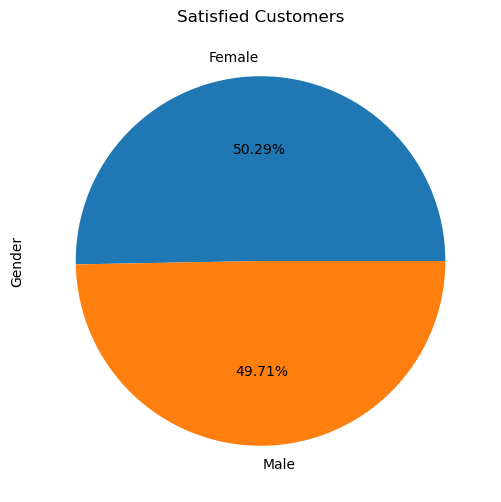

In [29]:
plt.figure(figsize=(6,6))
df[df['satisfaction']=='satisfied']['Gender'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Satisfied Customers')
plt.show()


In [30]:
plt.figure(figsize=(6,6))
df[df['satisfaction']=='neutral or dissatisfied']['Gender'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Un-satisfied Customers')
plt.show()

### Number of customers based on satisfaction

[Text(0, 0, '14573'), Text(0, 0, '11403')]

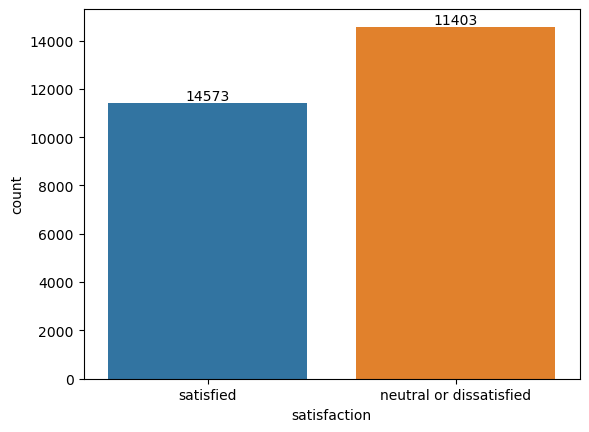

In [31]:
s = sns.countplot(x='satisfaction',data=df)
abs_values = df['satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values)

###  Count of customers based on gender

<Axes: xlabel='Gender', ylabel='count'>

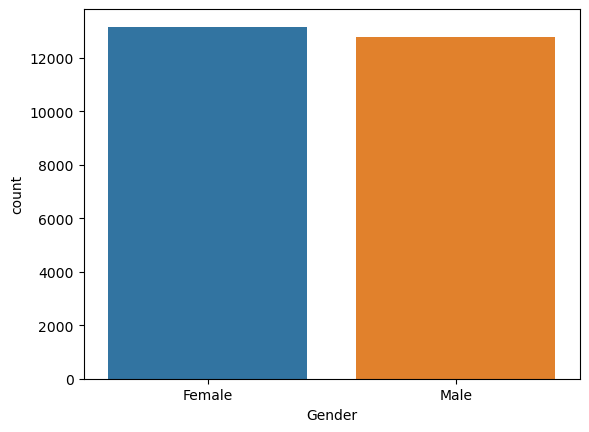

In [32]:
sns.countplot(x='Gender',data=df)

In [68]:
import plotly.express as px
fig=px.pie(df,values=df["satisfaction"].value_counts(),
           names=["Satisfied","neutral or dissatisfied"],title="<b>Satisfied And Dissatisfied Ratio",
           hole=.6,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

### Customer satisfaction based on customer type

In [33]:
sns.countplot(x='satisfaction',data=df, hue='Customer Type', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Customer Type', borderaxespad=0.)

### Customer satisfaction base based on type of travel

In [34]:
sns.countplot(x='satisfaction',data=df, hue='Type of Travel', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Type of Travel', borderaxespad=0.)

### Customer satisfaction base based on class of travel

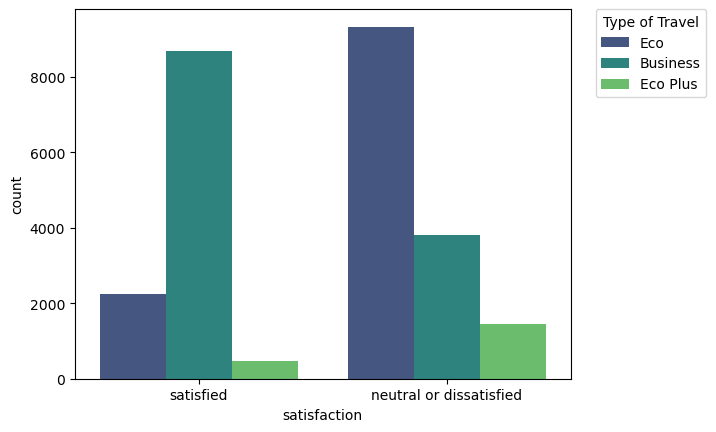

In [35]:
sns.countplot(x='satisfaction',data=df, hue='Class', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Type of Travel', borderaxespad=0.)

### Check the distibution of customer age

In [36]:
sns.set_style('whitegrid')
sns.histplot(x='Age', kde= True, data=df,bins=30)

<Axes: xlabel='Age', ylabel='Count'>

### Customer Profile based Age and Travel Type

In [37]:
sns.boxplot(x="Type of Travel", y="Age", data=df, palette="viridis")

<Axes: xlabel='Type of Travel', ylabel='Age'>

<Axes: xlabel='Class', ylabel='Flight Distance'>

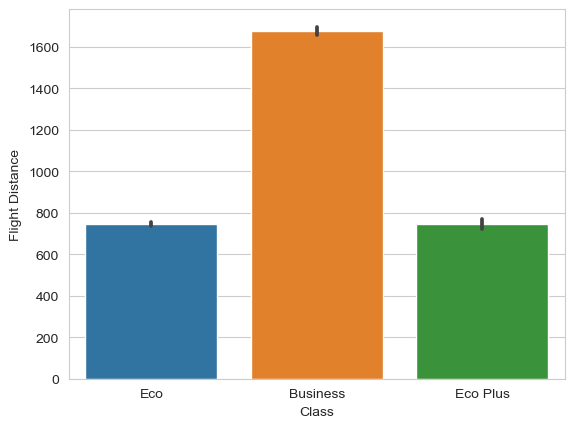

In [38]:
sns.barplot(x='Class',y='Flight Distance',data=df)

<Axes: xlabel='Customer Type', ylabel='Flight Distance'>

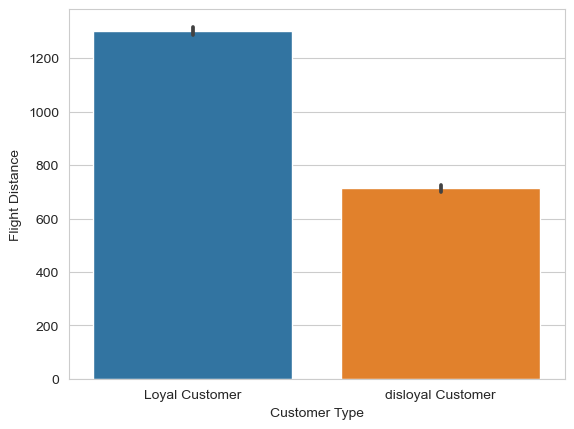

In [39]:
sns.barplot(x='Customer Type',y='Flight Distance',data=df)

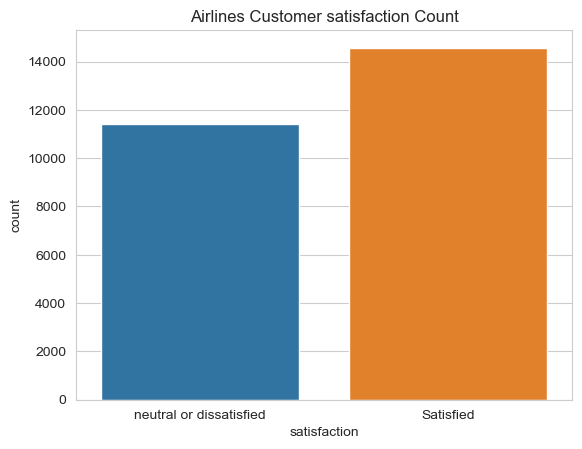

In [40]:
sns.countplot(x="satisfaction", data=df)
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['neutral or dissatisfied',"Satisfied"])
plt.show()

### To cheack correlation

<Axes: >

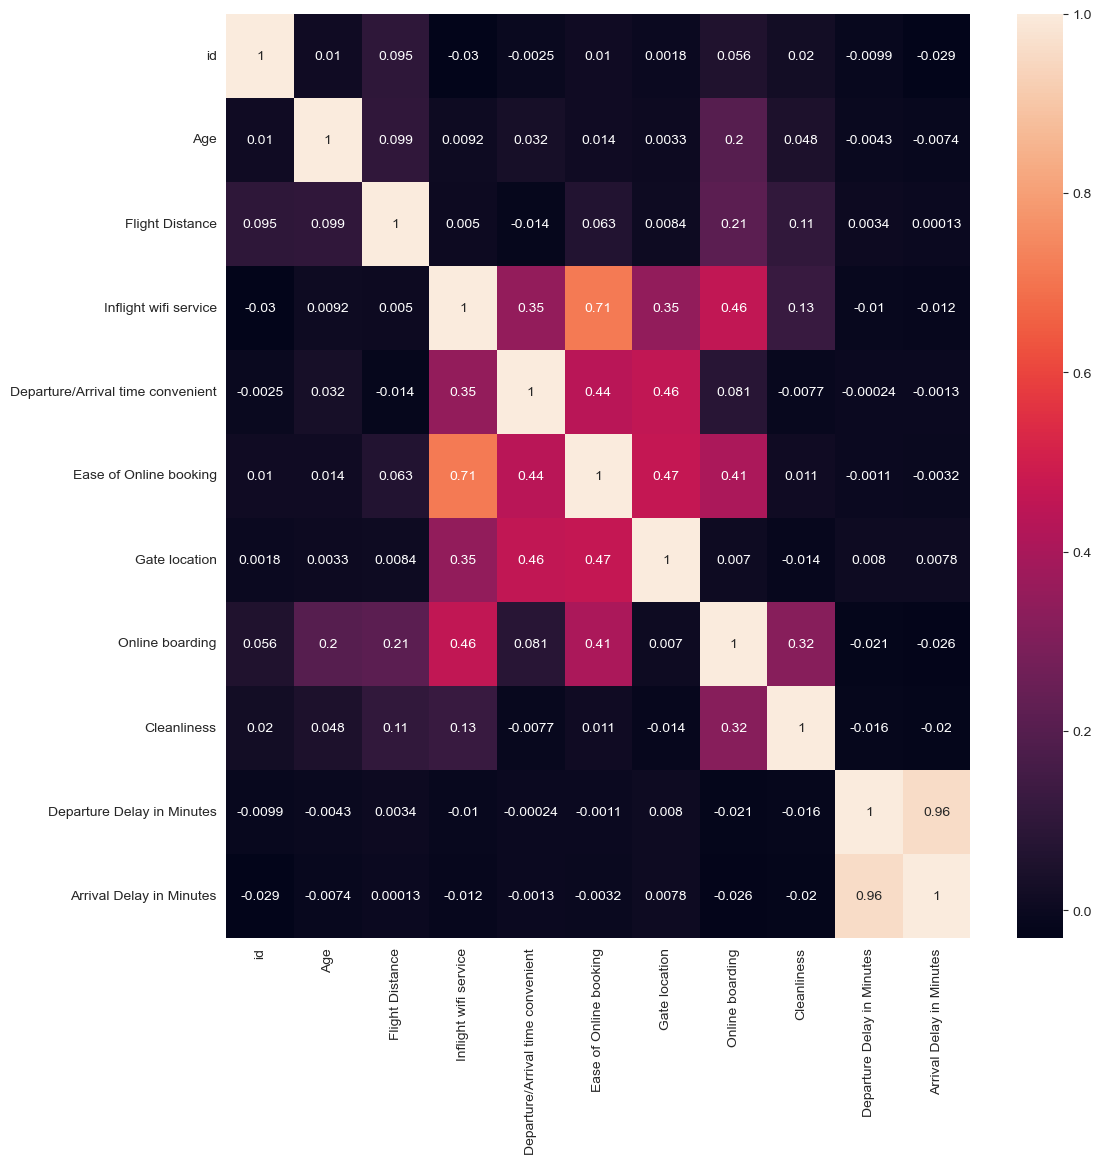

In [41]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<Axes: >

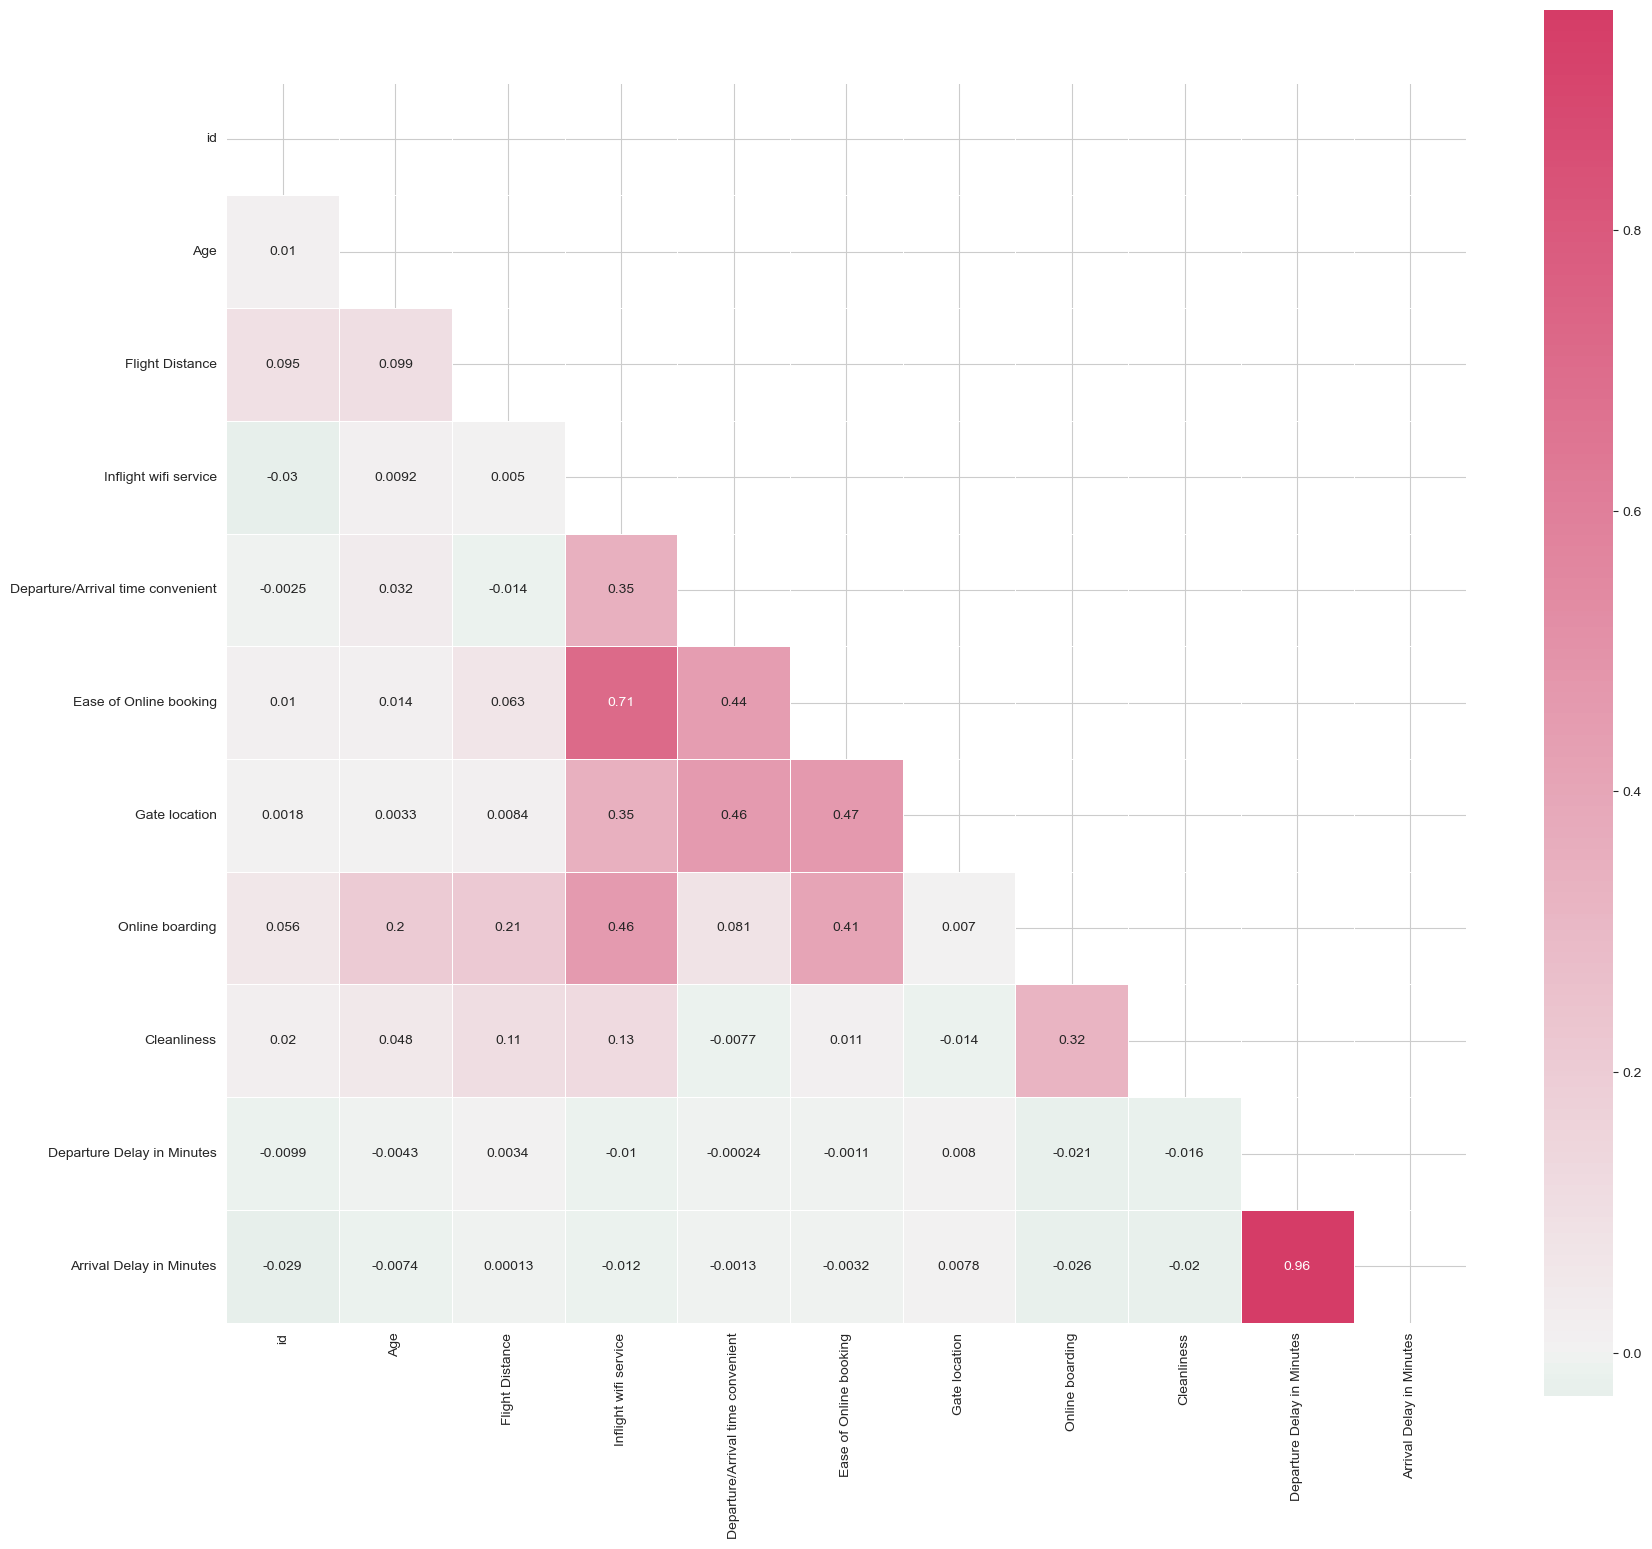

In [71]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Encoding

In [42]:
x=df.iloc[:,:-1]
x

id  Gender      Customer Type  Age   Type of Travel     Class  \
0      19556  Female     Loyal Customer   52  Business travel       Eco   
1      90035  Female     Loyal Customer   36  Business travel  Business   
2      12360    Male  disloyal Customer   20  Business travel       Eco   
3      77959    Male     Loyal Customer   44  Business travel  Business   
4      36875  Female     Loyal Customer   49  Business travel       Eco   
...      ...     ...                ...  ...              ...       ...   
25971  78463    Male  disloyal Customer   34  Business travel  Business   
25972  71167    Male     Loyal Customer   23  Business travel  Business   
25973  37675  Female     Loyal Customer   17  Personal Travel       Eco   
25974  90086    Male     Loyal Customer   14  Business travel  Business   
25975  34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Online boarding  Cleanliness  \
0                  4                4            5   
1                  1                4            5   
2                  4                2            2   
3                  2                4            4   
4                  3                1            4   
...              ...              ...          ...   
25971              1                3            4   
25972              4                4            4   
25973              5                1            2   
25974              3                4            4   
25975              5                2            1   

       Departure Delay in Minutes  Arrival Delay in Minutes  
0                              50                      44.0  
1                               0                       0.0  
2                               0                       0.0  
3                               0                       6.0  
4                               0                      20.0  
...                           ...                       ...  
25971                           0                       0.0  
25972                           0                       0.0  
25973                           0                       0.0  
25974                           0                       0.0  
25975                           0                       0.0  

[25976 rows x 15 columns]

In [43]:
y=df["satisfaction"]
y

0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25976, dtype: object

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [45]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Online boarding', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [46]:
ct=ColumnTransformer([
    ("oencoder",OrdinalEncoder(),['Gender', 'Customer Type',
                                 'Type of Travel', 'Class'
                                 ])],remainder="passthrough")

In [47]:
x=ct.fit_transform(x)
x

array([[ 0.,  0.,  0., ...,  5., 50., 44.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  2.,  0.,  0.],
       [ 1.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 0, ..., 0, 1, 0])

### split data into training and testing

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

### Scale the data

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(xtrain)
X_test_sc = sc_X.transform(xtest)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(xtrain)
X_test_minmax = min_max_scaler.fit_transform(xtest)

## Model Selection

In [65]:
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(xtrain, ytrain, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, xtrain, ytrain, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()

# Logistic Regression

Function to plot Learning Curve for any classifier

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(xtrain,ytrain)
pred_log1=log_reg1.predict(xtest)

print('Confusion Matrix is\n',confusion_matrix(ytest,pred_log1))
print('Accuracy is', accuracy_score(ytest,pred_log1))

Confusion Matrix is
 [[2142  823]
 [1077 1154]]
Accuracy is 0.634334103156274


In [53]:
log_reg3=LogisticRegression(max_iter=2500)
log_reg3.fit(xtrain,ytrain)
pred_log3=log_reg3.predict(xtest)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(ytest,pred_log3))
print('Accuracy is\n', accuracy_score(ytest,pred_log3))



Test Scores
Confusion Matrix is
 [[2142  823]
 [1077 1154]]
Accuracy is
 0.634334103156274


In [54]:
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train_minmax,ytrain)
pred_log2=log_reg2.predict(X_test_minmax)

print('Confusion Matrix is\n',confusion_matrix(ytest,pred_log2))
print('Accuracy is', accuracy_score(ytest,pred_log2))

Confusion Matrix is
 [[2659  306]
 [ 436 1795]]
Accuracy is 0.857197844495766


Scaled data using MinMax scaling performed better than other scaling methods and unscaled data

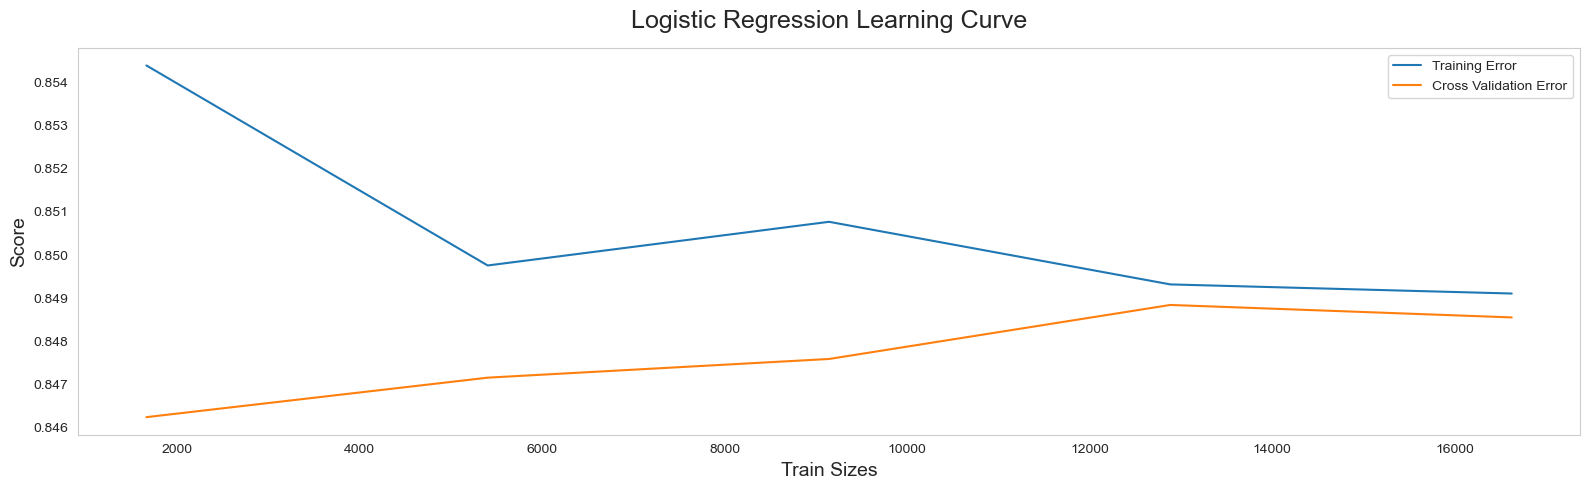

In [55]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_minmax, ytrain, log_reg2,title)

As train size increase, training score and cross validation score are converging which means less deviation in accuracy.

# KNeighbours Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
for k in range(10,18):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
  knn.fit(X_train_sc,ytrain)
  pred_knn = knn.predict(X_test_sc)

  print("k=",k)
  print('Confusion Matrix is ',confusion_matrix(ytest,pred_knn))
  print('Accuracy is', accuracy_score(ytest,pred_knn))
  print('\n')

k= 10
Confusion Matrix is  [[2784  181]
 [ 283 1948]]
Accuracy is 0.9107005388760585


k= 11
Confusion Matrix is  [[2734  231]
 [ 249 1982]]
Accuracy is 0.9076212471131639


k= 12
Confusion Matrix is  [[2775  190]
 [ 280 1951]]
Accuracy is 0.909545804464973


k= 13
Confusion Matrix is  [[2737  228]
 [ 253 1978]]
Accuracy is 0.907428791377983


k= 14
Confusion Matrix is  [[2772  193]
 [ 286 1945]]
Accuracy is 0.9078137028483448


k= 15
Confusion Matrix is  [[2733  232]
 [ 251 1980]]
Accuracy is 0.9070438799076213


k= 16
Confusion Matrix is  [[2761  204]
 [ 285 1946]]
Accuracy is 0.9058891454965358


k= 17
Confusion Matrix is  [[2734  231]
 [ 260 1971]]
Accuracy is 0.905504234026174




Knn algorithm performed best when value of k_neibours equals 11. So let's find the model's performance was better with scaled data using StandardScaler

In [57]:
knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,ytrain)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(ytest,knn_test))
print('Accuracy is', accuracy_score(ytest,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(ytrain,knn_train))
print('Accuracy is', accuracy_score(ytrain,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[2734  231]
 [ 249 1982]]
Accuracy is 0.9076212471131639


For Train
Confusion Matrix is
  [[10714   894]
 [  859  8313]]
Accuracy is 0.9156400384985564




In [58]:
plt.figure(figsize = (16,5))
title = 'kNeighbours Learning Curve'
plotLearningCurves(xtrain, ytrain, knn,title)

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(xtrain,ytrain)
  pred_dtc=dtc.predict(xtest)
  print("d=",d)
  print(accuracy_score(ytest,pred_dtc))

d= 20
0.9212856043110085
d= 21
0.9197459584295612
d= 22
0.922440338722094
d= 23
0.9218629715165512
d= 24
0.9220554272517321
d= 25
0.9218629715165512
d= 26
0.9232101616628176
d= 27
0.9235950731331793
d= 28
0.9205157813702848
d= 29
0.922440338722094


Decision tree classifier prformed best when max_depth is set to 25,max_leaf_nodes to 1000 and using entropy as criterion.

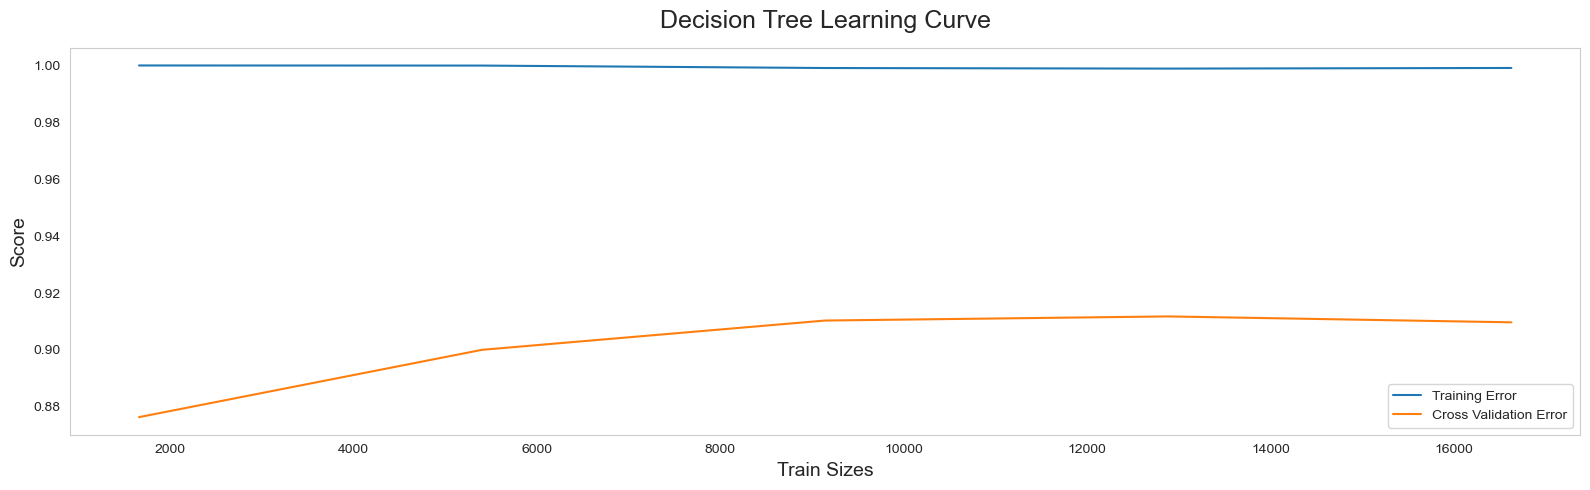

In [61]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(xtrain,ytrain)
#pred_dtc=dtc.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(xtrain,ytrain, dtc_best,title)

Cross validation score is increasing with increase in train size and also converging with training score. It means our model is learning well.

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

rfc.fit(X_train_sc, ytrain)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(ytest,pred_rfc))
print('Train Score:',accuracy_score(ytrain,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(ytest,pred_rfc))


Test Score: 0.9386066204772903
Train Score: 0.9997593840230992
Confusion Matrix for test set  
 [[2857  108]
 [ 211 2020]]


In [64]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(xtrain, ytrain, rfc,title)

We can see that as train sizes increases cross validation score and training score are converging. But still there is some deviation between them.

# Conclusion

In our problem to classify customers as satisfied or dissatisfied, best accuracy was achieved using RandomForest Classifier. The best train score and test score achieved are 0.99 and 0.93 respectively.